Homework 2: Simple linear regression using TensorFlow in Python

Universidad de Monterrey

Troy Alejandro Urdiales García

Inteligencia Artificial II

Andrés Hernández Gutiérrez

Viernes 30 de Agosto de 2024, San Pedro Garza García, Nuevo León

Al programar en Python, se recomienda importar cualquier biblioteca necesaria al inicio del Jupyter Notebook o script de Python. Las siguientes celdas de código importan las siguientes bibliotecas de Python:

* numpy: Se utiliza para crear vectores y realizar operaciones matemáticas.

* pandas: Se utiliza para la manipulación y análisis de datos. Ofrece estructuras de datos flexibles, como DataFrames, que permiten trabajar con datos etiquetados y tabulares de manera eficiente, facilitando operaciones como la limpieza, filtrado, agrupamiento y agregación de datos.

* tensorflow: Se utiliza para diseñar, entrenar, validar y probar el desarrollo de una red neuronal de una sola neurona.

* matplotlib: Se utiliza para propósitos de visualización, por ejemplo, trazar las curvas de aprendizaje para evaluar el proceso de entrenamiento.

* sklearn.model_selection: Esta biblioteca proporciona el método train_test_split para dividir el conjunto de datos inicial en los conjuntos de entrenamiento y validación.

In [1]:
# 1) Import standard libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Se define la función 'generate_data' que genera un conjunto de datos.

La función recibe los parámetros:
* 'true_coeffs' es un arreglo que representa los coeficientes verdaderos. Se define la intersección con un valor de 10 y una pendiente con un valor de 1.

* 'noise_std' es la desviación estándar del ruido normal que se añadirá a los datos para simular la variabilidad; siendo en este caso 2.

* 'num_samples' es el número de muestras a generar, en este caso 100 muestras.

Se establece una semilla para generar números aleatorios para garantizar que los datos generados sean reproducibles cada que se ejecute la función.

Se generan las variables originales:
* Se guarda en la variable 'x' una secuencia con valores de 0 a 99 aumentando de 1 en 1.

* Se guarda en la variable 'y' un conjunto de valores basado en la combinación lineal de 'x' más un componente de ruido aleatorio.

La forma de y se conforma por la suma de:
* 'true_coeffs[0]' es el intercepto en la ecuación. Al ser un arreglo [10,1] true_coeffs[0] es igual a 10. Este valor es una constante que se suma a cada valor en y, desplazando la línea hacia arriba en el eje y por 10 unidades.

* 'true_coeffs[1]*x' es la pendiente de la línea, con un valor de 1. Esto significa que por cada unidad que aumenta 'x', 'y' también aumenta en 1 (asumiendo que no hay ruido). 

* 'np.random.normal(loc=0.0, scale=noise_std, size=num_samples)' añade ruido aleatorio a la relación lineal para simular variabilidad en los datos.

La generación de ruido aleatorio se conforma de:

* 'loc=0.0' es la media de la distribución normal. Aquí, los valores generados estarán centrados en 0.

* 'scale=noise_std' define la desviación estándar de la distribución normal. Lo que significa que la mayoría de los valores generados estarán dentro de ±2 unidades alrededor de 0.

* 'size=num_samples' especifica cuántos valores aleatorios generar. Aquí, se generan 100 valores debido a num_samples.

Al terminar la función devuelve una tupla que contiene los valores de x y y.

In [2]:
# 2) Generate a dataset
def generate_data(true_coeffs = np.array([10,1]), noise_std = 2, num_samples = 100):
    
    #Seed for reproducibility
    np.random.seed(4500)
    
    #Generate synthetic data
    x = np.arange(0,100,1)
    y = true_coeffs[0] + true_coeffs[1]*x + np.random.normal(loc = 0.0, scale = noise_std, size = num_samples)
    
    #Return features and response
    return (x,y)

En este momento se definen los parámetros de los coeficientes verdaderos y la desviación estándar, para proceder a generar el conjunto de datos para una regresión lineal simple, haciendo uso de la función previamente definida.

In [3]:
#Generate a synthetic dataset for simple linear regression
true_coeffs = np.array([10,1])
noise_std = 5
x, y = generate_data(true_coeffs=true_coeffs, noise_std=noise_std, num_samples=100)

Se procede con la exploración de los datos, presentados visualmente en una gráfica.

* Comienza por la definición de la figura con un ancho de 10 pulgadas y una altura 7 pulgadas.

* Se genera un gráfico de dispersión de los datos, llevando por título 'Synthetic dataset'.

* Usando la notación LaTex se etiquetan ambos ejes.

* El título del gráfico describe el modelo utilizado, usando la notación LaTex.

* Se aplica una leyenda.

* Se ejecuta el comando para desplegar el gráfico.

<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
C:\Users\troyu\AppData\Local\Temp\ipykernel_19728\1473350864.py:6: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize = 20)


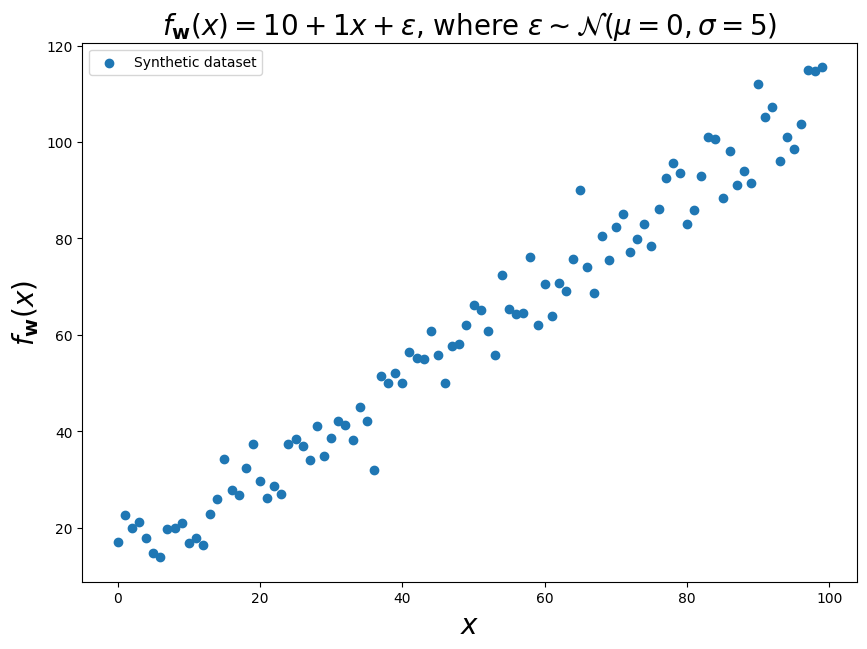

In [4]:
# 3) Explore the dataset (Exploratory Data Analysis EDA)
#Visualise the generated synthetica dataset
plt.figure(figsize=(10,7))
plt.scatter(x, y, label='Synthetic dataset')
plt.xlabel(r"$x$", fontsize = 20)
plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize = 20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x) = {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$", fontsize = 20)
plt.legend()
plt.show()

Tras visualizar los datos se procede con la división de datos en conjuntos de entrenamiento y prueba, y luego se visualizan ambos tipos de datos para ver la distribución en el gráfico.

Comenzando por la división de los datos:
* Se generan las 4 variables responsables de guardar los datos tras la división de ellos (x_train, x_test, y_train, y_test).

* Usando el 'train_test_split' de la librería 'sklearn.model_selection' se define que los datos saldran de las variables 'x' y 'y', estableciendo que 20% de los datos son para prueba y 80% de los datos para entrenamiento. Se fijara con una semilla y se aplicara la función de 'shuffle' para generar aleatoriedad.

Después la generación del gráfico:
* La figura con un ancho de 10 pulgadas y una altura 7 pulgadas.

* Se genera un gráfico de dispersión de los datos de entrenamiento, llevando por título 'Testing dataset'.

* Se genera un segundo gráfico de dispersión de los datos originales, llevando por título 'Training dataset'; cambiando el color de punto a rojo.

* Usando la notación LaTex se etiquetan ambos ejes.

* El título del gráfico describe el modelo utilizado, usando la notación LaTex.

* Se aplica una leyenda.

* Se ejecuta el comando para desplegar el gráfico.

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
C:\Users\troyu\AppData\Local\Temp\ipykernel_19728\4250156000.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize = 20)


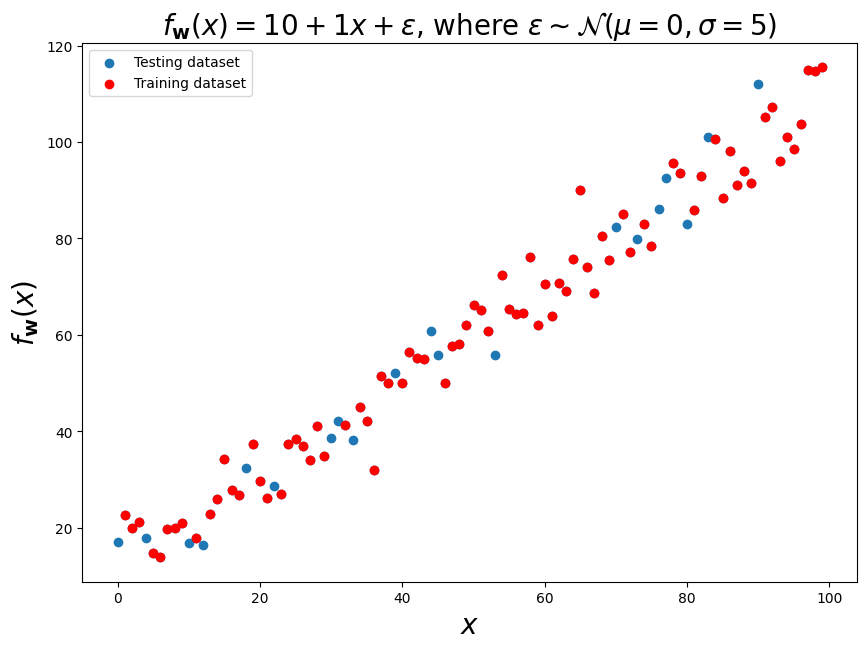

In [5]:
# 4) Split the original dataset
#Split the data into training and testing sets using train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, shuffle = True)

#Visualise the generated synthetica dataset
plt.figure(figsize = (10,7))
plt.scatter(x, y, label='Testing dataset')
plt.scatter(x_train, y_train, label='Training dataset', color=[1,0,0])
plt.xlabel(r"$x$", fontsize = 20)
plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize = 20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x) = {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon$, where $\epsilon\sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$", fontsize = 20)
plt.legend()
plt.show()

Se construye y compila el modelo de regresión lineal simple utilizando una red neuronal en TensorFlow con la API de Keras.

* Se identifica el modelo bajo el nombre del 'model', definiendo que es modelo secuencial. Siendo un contenedor lineal de capas donde cada capa tiene exactamente una entrada y una salida. Este modelo tendrá 2 capas.

* La primera capa (capa de entrada) indica que cada dato tiene una sola característica, ya que es una regresión lineal simple.

* Se agrega una capa densa, completamente conectada, con una sola neurona.

* Se compila el modelo haciendo uso del optimizador 'adam' para ajustar los pesos durante el entrenamiento. Y se agrega la función de pérdida 'Mean Squared Error (MSE)' para medir la diferencia promedio entre los valores predichos por el modelo y los valores reales, al cuadrado.

* Al final se presenta un resumen del modelo, que contiene información de las capas, el número de pesos y sesgos en cada capa, y el total de parámetros del modelo.

In [6]:
# 5) Design the neural network architecture
#Build the linear regression model using a multiple-input single neuron
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

#Compile the model
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Ahora se entrena el modelo de regresión lineal anterior, evaluando su rendimiento en un conjunto de datos prueba, para después imprimir los pesos y sesgos aprendidos por la red neuronal.

Se aplica un 'fit' al modelo 'model':
* Se utilizan los datos de las variables de entrenamiento.

* Indicando que el modelo se entrenará por 500 épocas.

* Dividiendo los datos en lotes de 10.

* Se separa el 10% del conjunto de entrenamiento para validación.

* Indicando que se mostrará información sobre el proceso de entrenamiento, incluyendo la pérdida y la métrica de precisión para cada época.

* Luego se evalúa el modelo usando las variables de prueba.

Para obtener y visualizar los pesos de entrenamiento: 
* Se guarda en la variable 'weights' los pesos y sesgos aprendidos por la capa densa.

* 'weights[0]' corresponde a los pesos (w1) que multiplican las entradas x en la ecuación de la línea.

* 'weights[1]' corresponde a los sesgos (w0), que representan el intercepto en la ecuación de la línea.

In [7]:
# 6) Train the neural network model
#Train the model
model.fit(x_train, y_train, epochs=500, batch_size=10, validation_split=0.10, verbose=1)

#Evaluate the model
loss = model.evaluate(x_test, y_test)
print(f'\nTest Loss: {loss}')

#Print the widgets of the trained model
weights = model.layers[0].get_weights()
print(f"Weights [w1]: {weights[0]}")
print(f"Biases [w0]: {weights[1]}")

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 10158.8242 - val_loss: 13315.4619
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9906.8340 - val_loss: 13197.9463
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8641.0918 - val_loss: 13082.5391
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10511.6992 - val_loss: 12964.3613
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9236.0781 - val_loss: 12852.5762
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9548.3340 - val_loss: 12747.2344
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9778.8145 - val_loss: 12641.2168
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8340.9648 - val_loss: 12535.9688
Epoch 9/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10365.1084 - val_loss: 12423.9639
Epoch 10/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9039.2676 - val_loss: 12322.3359
Epoch 11/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9419.8018 - val_loss: 12213.2949
Epoc

Se llevan a cabo predicciones utilizando el modelo entrenado sobre el conjunto de datos de prueba y también de entrenamiento.

* 'y_pred' sobre el conjunto de prueba.

* 'y_pred_train' sobre el conjunto de entrenamiento.

In [8]:
# 7) Make predictions
#Make predictions
y_pred = model.predict(x_test)

#Make predictions
y_pred_train = model.predict(x_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


Por último se visualiza el modelo entrenado superpuesto sobre los datos de entrenamiento.

* Se configura el tamaño a 12 pulgadas de ancho y 6 pulgadas de alto.

* Se genera el gráfico de dispersión con los datos de entrenamiento bajo el título de 'Training data'.

* Se grafican los datos usando las entradas de entrenamiento y las salidas predichas por el modelo, bajo la etiqueta de 'Model', con un grosor en la línea de 3, en color rojo.

* Usando la notación LaTex se etiquetan ambos ejes.

* Se aplica una leyenda.

<>:8: SyntaxWarning: invalid escape sequence '\h'
<>:8: SyntaxWarning: invalid escape sequence '\h'
C:\Users\troyu\AppData\Local\Temp\ipykernel_19728\4007459069.py:8: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("$\hat{f}_{\mathbf{w}}(x)$", fontsize = 20)


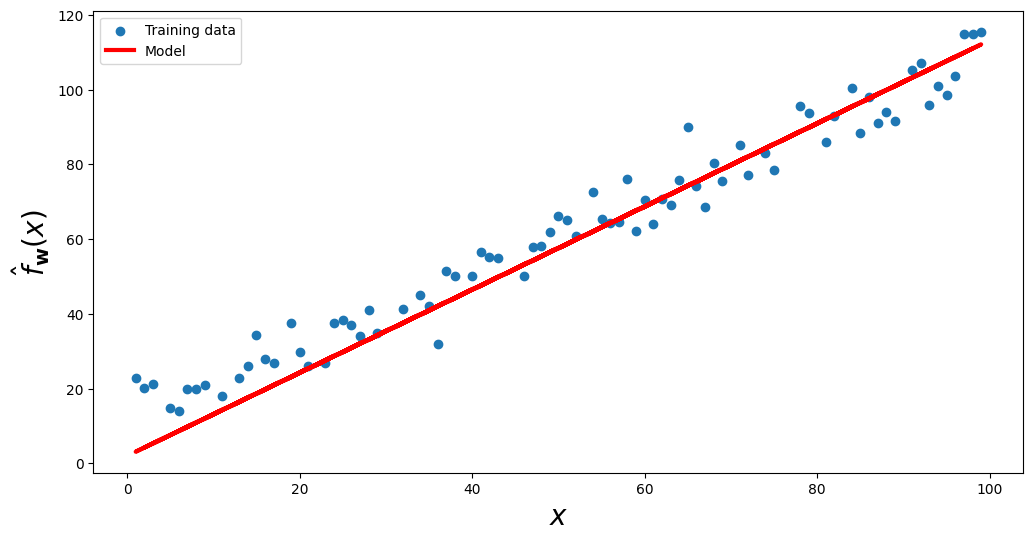

In [9]:
# 8) Visualise the learnt model
#Plot the results
plt.figure(figsize=(12,6))

plt.scatter(x_train, y_train, label='Training data')
plt.plot(x_train, y_pred_train, label='Model', linewidth=3, color=[1,0,0])
plt.xlabel(r'$x$', fontsize = 20)
plt.ylabel("$\hat{f}_{\mathbf{w}}(x)$", fontsize = 20)
plt.legend();

Conclusiones y reflexiones personales

A través de esta tarea, he aprendido el proceso de implementar una regresión lineal simple utilizando TensorFlow. Generar y visualizar los datos me permitió ver cómo se comportan los modelos bajo diferentes condiciones, lo cual es importante para el desarrollo de modelos predictivos efectivos. Además, el uso de train_test_split para dividir los datos en conjuntos de entrenamiento y prueba reforzó la importancia de validar los modelos para garantizar su generalización. 

Código de honor

Doy mi palabra que he realizado con integridad académica.